# Практическая работа 1
## Выполнил Гневнов А.Е., ИВТ 2.1
## Подготовка данных и обучение модели

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
import pickle
import warnings

warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

### 1. Загрузка и анализ данных

In [2]:
df = pd.read_csv('WineQT.csv')
print("Размерность данных:", df.shape)

Размерность данных: (1143, 13)


In [3]:
# Первичный анализ
print("\nПервые 5 строк:")
display(df.head())

print("\nИнформация о данных:")
display(df.info())

print("\nСтатистика:")
display(df.describe())


Первые 5 строк:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4



Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


None


Статистика:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


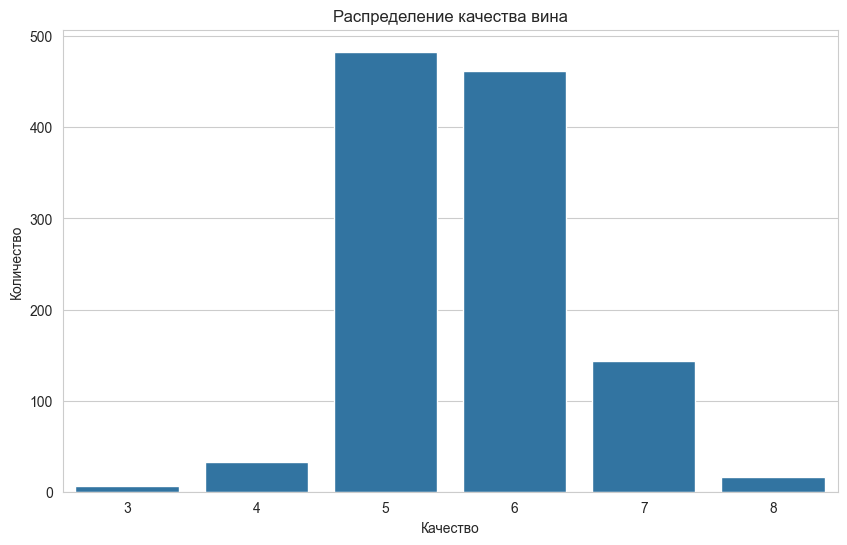

In [4]:
# Анализ целевой переменной
plt.figure(figsize=(10, 6))
sns.countplot(x='quality', data=df)
plt.title('Распределение качества вина')
plt.xlabel('Качество')
plt.ylabel('Количество')
plt.show()

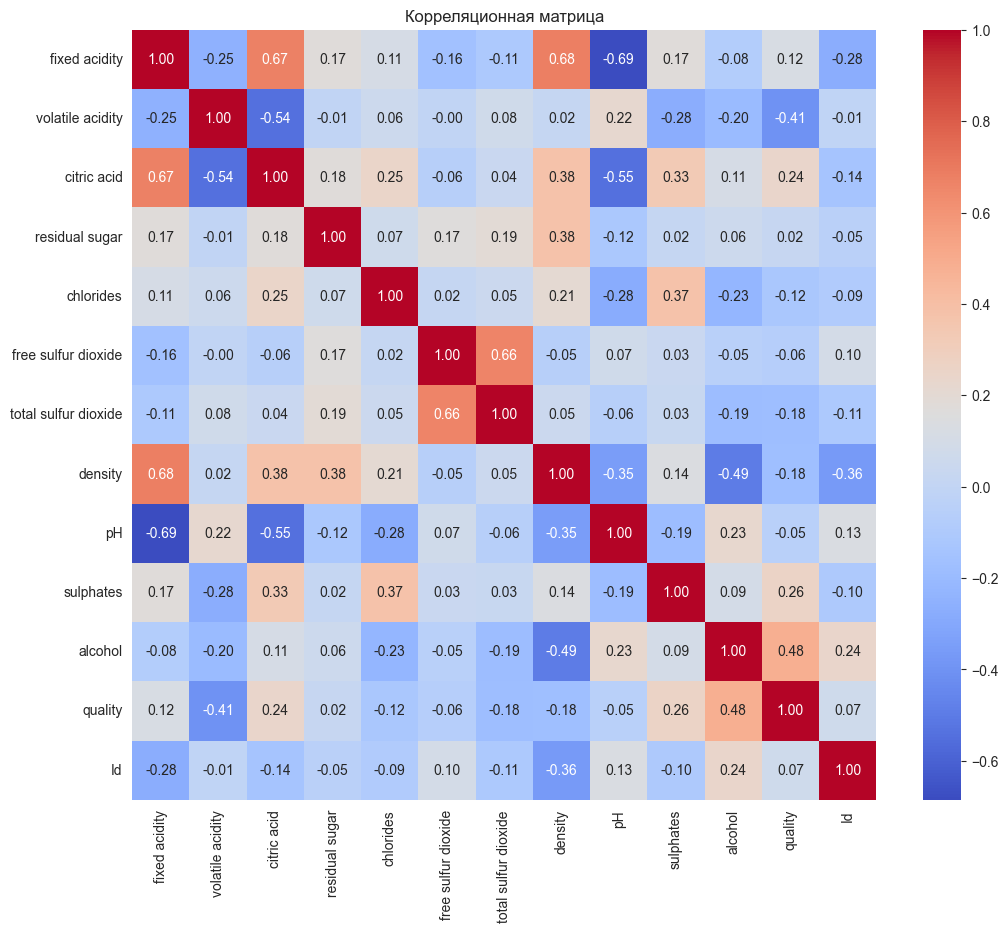

In [5]:
# Корреляционный анализ
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Корреляционная матрица')
plt.show()

### 2. Подготовка данных

In [6]:
# Разделение на признаки и целевую переменную
X = df.drop(['quality', 'Id'], axis=1)
y = df['quality']

In [7]:
# Разделение на обучающую, валидационную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.176, random_state=42, stratify=y_train
)

print(f"Обучающая выборка: {X_train.shape[0]} записей")
print(f"Валидационная выборка: {X_val.shape[0]} записей")
print(f"Тестовая выборка: {X_test.shape[0]} записей")

Обучающая выборка: 800 записей
Валидационная выборка: 171 записей
Тестовая выборка: 172 записей


In [8]:
# Масштабирование признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Сохранение скейлера
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

### 3. Обучение моделей

In [9]:
# Инициализация моделей
models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'SVM': SVC(random_state=42, probability=True),
    'KNN': KNeighborsClassifier(),
    'MLP': MLPClassifier(random_state=42, max_iter=1000)
}

In [10]:
# Обучение и оценка моделей
results = {}

for name, model in models.items():
    print(f"\nОбучение модели: {name}")
    model.fit(X_train_scaled, y_train)
    
    # Предсказания на валидационной выборке
    y_pred = model.predict(X_val_scaled)
    
    # Расчет метрик
    accuracy = accuracy_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred, average='weighted')
    
    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'f1_score': f1
    }
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(classification_report(y_val, y_pred))


Обучение модели: RandomForest
Accuracy: 0.6316
F1 Score: 0.6152
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         5
           5       0.73      0.72      0.73        72
           6       0.60      0.70      0.64        69
           7       0.40      0.36      0.38        22
           8       0.00      0.00      0.00         2

    accuracy                           0.63       171
   macro avg       0.29      0.30      0.29       171
weighted avg       0.60      0.63      0.62       171


Обучение модели: DecisionTree
Accuracy: 0.5380
F1 Score: 0.5382
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.25      0.20      0.22         5
           5       0.60      0.62      0.61        72
           6       0.57      0.51      0.54        69
           7       0.39      0.50      0.44        22
  

In [11]:
# Сводная таблица результатов
results_df = pd.DataFrame.from_dict(results, orient='index')
results_df.drop(columns='model', inplace=True)
results_df.sort_values(by='f1_score', ascending=False, inplace=True)

display(results_df)

,accuracy,f1_score
MLP,0.631579,0.623840
RandomForest,0.631579,0.615210
SVM,0.590643,0.567002
DecisionTree,0.538012,0.538167
KNN,0.502924,0.489269


<Figure size 1000x600 with 0 Axes>

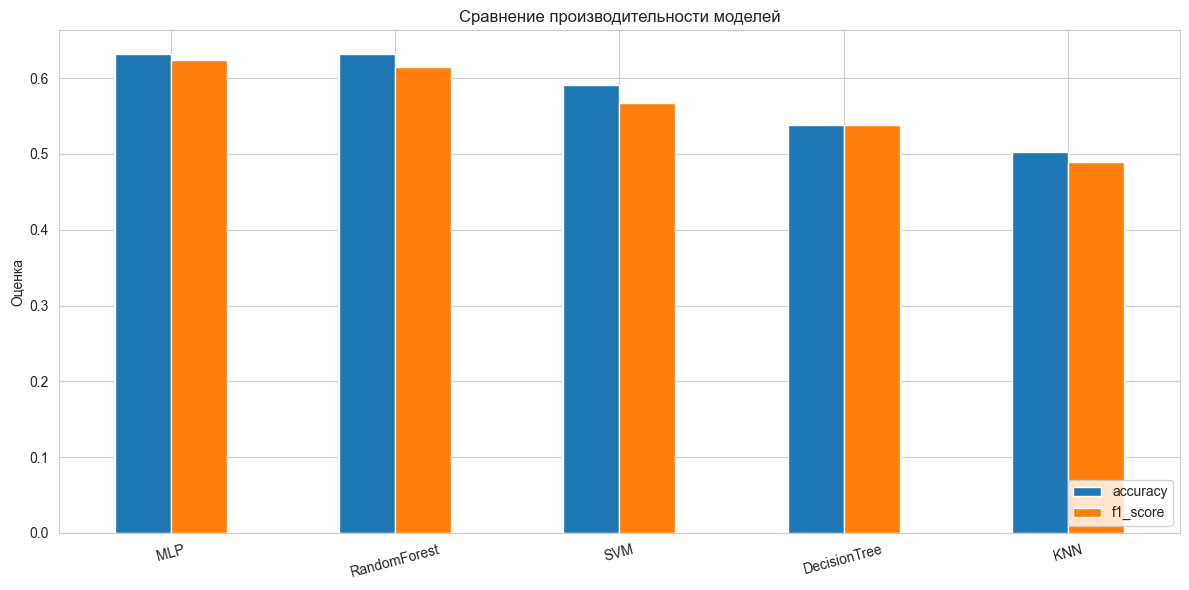

In [12]:
# Визуализация результатов
plt.figure(figsize=(10, 6))
results_df.plot(kind='bar', y=['accuracy', 'f1_score'], figsize=(12, 6))
plt.title('Сравнение производительности моделей')
plt.ylabel('Оценка')
plt.xticks(rotation=15)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

### 5. Тюнинг лучшей модели

In [13]:
# Выбор лучшей модели
best_model_name = results_df.index[0]
best_model = results[best_model_name]['model']
print(f"Лучшая модель: {best_model_name}")

Лучшая модель: MLP


In [14]:
# Параметры для GridSearchCV
param_grids = {
    'RandomForest': {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5]
    },
    'XGBoost': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5]
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    },
    'KNN': {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance']
    },
    'MLP': {
        'hidden_layer_sizes': [(50,), (100,)],
        'alpha': [0.0001, 0.001]
    }
}

In [15]:
# Тюнинг выбранной модели
if best_model_name in param_grids:
    print(f"\nТюнинг модели: {best_model_name}")
    grid_search = GridSearchCV(
        estimator=best_model,
        param_grid=param_grids[best_model_name],
        scoring='f1_weighted',
        cv=3,
        n_jobs=-1,
        verbose=1
    )
    
    grid_search.fit(X_train_scaled, y_train)
    
    # Обновление лучшей модели
    best_model = grid_search.best_estimator_
    print(f"Лучшие параметры: {grid_search.best_params_}")
    
    # Оценка после тюнинга
    y_val_pred = best_model.predict(X_val_scaled)
    tuned_f1 = f1_score(y_val, y_val_pred, average='weighted')
    print(f"F1 после тюнинга: {tuned_f1:.4f}")


Тюнинг модели: MLP
Fitting 3 folds for each of 4 candidates, totalling 12 fits
Лучшие параметры: {'alpha': 0.001, 'hidden_layer_sizes': (100,)}
F1 после тюнинга: 0.6193


### 6. Оценка на тестовых данных

In [16]:
# Финальная оценка
y_test_pred = best_model.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

print(f"\nРезультаты на тестовых данных:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"F1 Score: {test_f1:.4f}")
print(classification_report(y_test, y_test_pred))


Результаты на тестовых данных:
Accuracy: 0.6453
F1 Score: 0.6332
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         5
           5       0.71      0.77      0.74        73
           6       0.65      0.66      0.65        70
           7       0.47      0.43      0.45        21
           8       0.00      0.00      0.00         2

    accuracy                           0.65       172
   macro avg       0.31      0.31      0.31       172
weighted avg       0.62      0.65      0.63       172



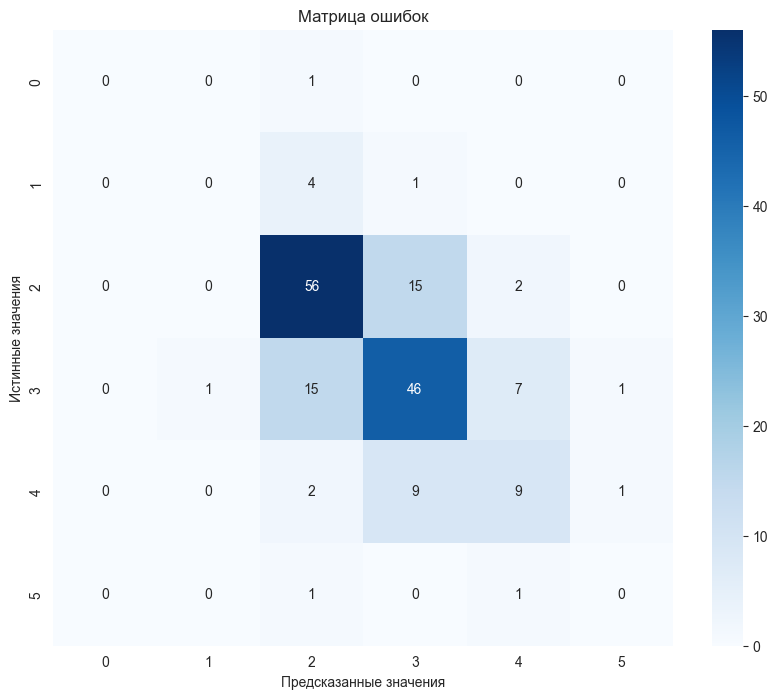

In [17]:
# Матрица ошибок
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Матрица ошибок')
plt.xlabel('Предсказанные значения')
plt.ylabel('Истинные значения')
plt.show()

### 7. Сохрананяем модель

In [18]:
# Сохранение лучшей модели
with open('best_wine_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)
print("Модель сохранена как 'best_wine_model.pkl'")

Модель сохранена как 'best_wine_model.pkl'


### 8. Пример использования модели и скейлера

In [19]:
def predict_wine_quality(features):
    """Предсказывает качество вина на основе входных признаков"""
    # Загрузка модели и скейлера
    with open('best_wine_model.pkl', 'rb') as f:
        model = pickle.load(f)
    with open('scaler.pkl', 'rb') as f:
        scaler = pickle.load(f)
    
    # Преобразование признаков
    scaled_features = scaler.transform([features])
    
    # Предсказание
    prediction = model.predict(scaled_features)
    return prediction[0]

# Пример использования
sample_wine = {
    'fixed acidity': 7.4,
    'volatile acidity': 0.70,
    'citric acid': 0.00,
    'residual sugar': 1.9,
    'chlorides': 0.076,
    'free sulfur dioxide': 11.0,
    'total sulfur dioxide': 34.0,
    'density': 0.9978,
    'pH': 3.51,
    'sulphates': 0.56,
    'alcohol': 9.4
}

# Убедимся, что порядок признаков соответствует обучению
features_ordered = [sample_wine[col] for col in X.columns]
predicted_quality = predict_wine_quality(features_ordered)
print(f"\nПредсказанное качество вина: {predicted_quality}")


Предсказанное качество вина: 5
